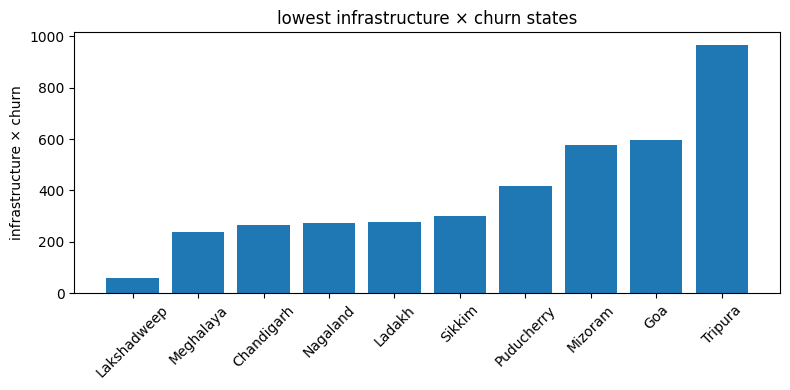

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

enrolment=pd.read_parquet("../sql/data/data_cache/enrolment_clean.parquet")
enrol=enrolment.groupby("state").size().reset_index(name="enrolments")

demo=pd.read_parquet("../sql/data/data_cache/demographic_clean.parquet")
bio=pd.read_parquet("../sql/data/data_cache/biometric_clean.parquet")
updates=pd.concat([demo,bio]).groupby("state").size().reset_index(name="updates")

centres=pd.read_csv("../sql/data/Aadhar.csv")
centres=centres.rename(columns={"State":"state","No. of centres":"centres"})
centres["centres"]=pd.to_numeric(centres["centres"],errors="coerce")

df=enrol.merge(updates,on="state").merge(centres,on="state")

df["churn"]=df["updates"]/df["enrolments"]
df["infra_x_churn"]=df["churn"]*df["centres"]

df=df.sort_values("infra_x_churn").head(10)

plt.figure(figsize=(8,4))
plt.bar(df["state"],df["infra_x_churn"])
plt.xticks(rotation=45)
plt.ylabel("infrastructure × churn")
plt.title("lowest infrastructure × churn states")
plt.tight_layout()
plt.show()
